In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


In [2]:
# Load data
df = pd.read_csv('locations_info.csv')

# Group by month and country
df_country = df.groupby(['Month', 'Country']).agg({'Occurrences': 'sum', 'Latitude': 'first', 'Longitude': 'first'}).reset_index()


In [13]:

# Calculando a porcentagem de valores nulos na coluna 'Estado' em relação ao total de entradas
porcentagem_nulos_estado = (df['Estado'].isnull().sum() / len(df)) * 100
print("Porcentagem de estados nulos em relação ao total de entradas: {:.2f}%".format(porcentagem_nulos_estado))

# Calculando a porcentagem de valores nulos na coluna 'Cidade' em relação ao total de entradas
porcentagem_nulos_cidade = (df['Cidade'].isnull().sum() / len(df)) * 100
print("Porcentagem de cidades nulas em relação ao total de entradas: {:.2f}%".format(porcentagem_nulos_cidade))


Porcentagem de estados nulos em relação ao total de entradas: 34.61%
Porcentagem de cidades nulas em relação ao total de entradas: 32.77%


In [12]:
# Valores únicos de estado
valores_unicos_estado = df['Estado'].unique()

# Quantidade de valores nulos nos valores únicos de estado
valores_nulos_estado = pd.Series(valores_unicos_estado).isnull().sum()
print("Quantidade de estados nulos: ", valores_nulos_estado)

# Valores únicos de cidade
valores_unicos_cidade = df['Cidade'].unique()

# Quantidade de valores nulos nos valores únicos de cidade
valores_nulos_cidade = pd.Series(valores_unicos_cidade).isnull().sum()
print("Quantidade de cidades nulas: ", valores_nulos_cidade)



print(f'Porcentagem estados nulos: {valores_nulos_estado} ({(valores_nulos_estado / df.shape[0]) * 100:.2f}%)')
print(f'Porcentagem cidades nulas: {valores_nulos_cidade} ({(valores_nulos_cidade / df.shape[0]) * 100:.2f}%)')

Quantidade de estados nulos:  1
Quantidade de cidades nulas:  1
Porcentagem estados nulos: 1 (0.00%)
Porcentagem cidades nulas: 1 (0.00%)


In [ ]:
# paleta de cores vermelho: [(255, 204, 204), (255, 153, 153), (255, 102, 102), (255, 51, 51), (255, 0, 0), (204, 0, 0), (153, 0, 0), (204, 0, 0), (51, 0, 0)]

/tmp/ipykernel_7168/3250793684.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/tmp/ipykernel_7168/3250793684.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['Country'] = df_month['Country'].map(country_mapping).fillna(df_month['Country'])
/home/barbara/.local/lib/python3.10/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 9 classes. Setting k to 8.
  self.bins = quantile(y, k=k)


[     0.  87527. 175054. 262581. 350108. 437635. 525162. 612689. 700216.
 787743.]


Text(0.5, 1.0, 'Number of srcIP - MiscAttack in 2023-2')

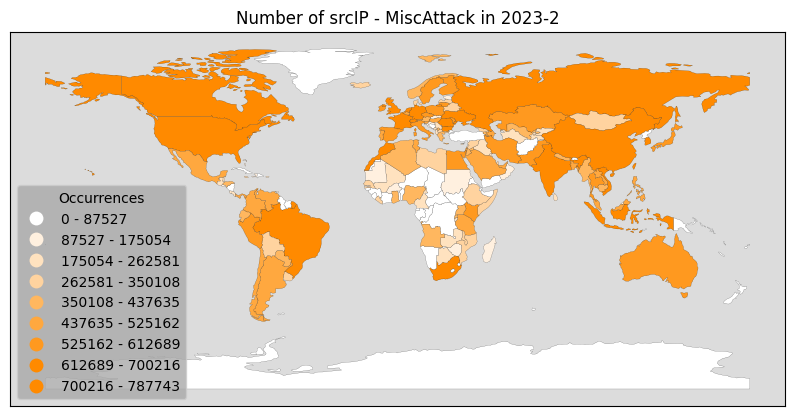

In [11]:
# Load world map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Country name mapping
country_mapping = {
    'United States': 'United States of America',
    'The Netherlands': 'Netherlands'
}

df_month = df_country[df_country['Month'] == '2023-2']
# Update country names
df_month['Country'] = df_month['Country'].map(country_mapping).fillna(df_month['Country'])

fig, ax = plt.subplots(figsize=(10, 10))

# Merge the world and df_month DataFrames based on the country name
merged_df = pd.merge(world, df_month, left_on='name', right_on='Country', how='left')

# Fill NaN values in the 'occurrences' column with corresponding values from the merged_df DataFrame
world['occurrences'] = merged_df['Occurrences'].fillna(0)
# Remove unnecessary columns from the world DataFrame
world.drop(columns=['Country', 'Month', 'Latitude', 'Longitude'], inplace=True, errors='ignore')

if( world['occurrences'].max() < 100):
    # Group the occurrences into bins for legend
    bins = np.linspace(world['occurrences'].min(), world['occurrences'].max(), 3)  # Define 5 bins
    world['occurrences_group'] = np.digitize(world['occurrences'], bins, right=True)
    k = 2
elif( world['occurrences'].max() < 200):
    # Group the occurrences into bins for legend
    bins = np.linspace(world['occurrences'].min(), world['occurrences'].max(), 4)  # Define 5 bins
    world['occurrences_group'] = np.digitize(world['occurrences'], bins, right=True)
    k = 3
elif( world['occurrences'].max() < 300):
    # Group the occurrences into bins for legend
    bins = np.linspace(world['occurrences'].min(), world['occurrences'].max(), 5)  # Define 5 bins
    world['occurrences_group'] = np.digitize(world['occurrences'], bins, right=True)
    k = 4
else:
    # Group the occurrences into bins for legend
    bins = np.linspace(world['occurrences'].min(), world['occurrences'].max(), 10)  # Define 5 bins
    world['occurrences_group'] = np.digitize(world['occurrences'], bins, right=True)
    k = 9

#Plot the map
# Configurar a legenda manualmente com os limites dos bins
legend_labels = []
for i in range(len(bins)-1):
    legend_labels.append(f"{bins[i]:.0f} - {bins[i+1]:.0f}")

#print(legend_labels) #saida: ['0 - 7736', '7736 - 15473', '15473 - 23209', '23209 - 30946', '30946 - 38682']

# Defina os pontos de quebra para cada cor da legenda
breakpoints = bins[:-1]
print(bins)

# Defina as cores correspondentes a cada intervalo
colors_hex = ['#FFFFFF', '#FFEBD4', '#FFD8AA', '#FFC57F', '#FFB255', '#FF9E2A', '#FF8A00']

# Crie um LinearSegmentedColormap com base nas cores e pontos de quebra
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", list(zip(np.linspace(0, 1, len(colors_hex)), colors_hex)), N=len(breakpoints))

# Plotar o mapa usando o novo mapa de cores
world.plot(ax=ax, column='occurrences', missing_kwds={'color': 'lightgrey'}, legend=True, scheme="quantiles", legend_kwds={"loc": "lower left", "fmt": "{:.0f}", "title": "Occurrences", 'labels':legend_labels, 'facecolor': 'DarkGray'}, cmap=custom_cmap, edgecolor='black', linewidth=0.1, k=k)
ax.set_facecolor('Gainsboro')

# Remover a última entrada da legenda

#leg = ax.get_legend()

#leg.set_bbox_to_anchor((1.17,0.5))
#ax.set_axis_off()

# Turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

ax.set_title(f'Number of srcIP - MiscAttack in 2023-2')

/tmp/ipykernel_7168/646016151.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/tmp/ipykernel_7168/646016151.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['Country'] = df_month['Country'].map(country_mapping).fillna(df_month['Country'])
/home/barbara/.local/lib/python3.10/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 8.
  self.bins = quantile(y, k=k)


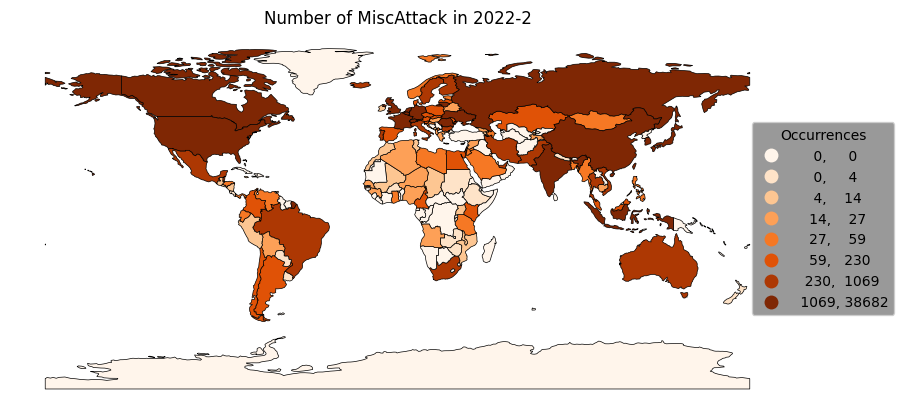

In [3]:

import matplotlib.pyplot as plt
import numpy as np

# Load world map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Country name mapping
country_mapping = {
    'United States': 'United States of America',
    'The Netherlands': 'Netherlands'
}

# Create the images for each month
images = []

df_month = df_country[df_country['Month'] == '2022-2']

# Update country names
df_month['Country'] = df_month['Country'].map(country_mapping).fillna(df_month['Country'])

fig, ax = plt.subplots(figsize=(10, 10))

# Merge the world and df_month DataFrames based on the country name
merged_df = pd.merge(world, df_month, left_on='name', right_on='Country', how='left')

# Fill NaN values in the 'occurrences' column with corresponding values from the merged_df DataFrame
world['occurrences'] = merged_df['Occurrences'].fillna(0)  # Replace NaN with 0

# Remove unnecessary columns from the world DataFrame
world.drop(columns=['Country', 'Month', 'Latitude', 'Longitude'], inplace=True, errors='ignore')

# Group the occurrences into bins for legend
# bins = np.linspace(world['occurrences'].min(), world['occurrences'].max(), 6)  # Define 5 bins
# world['occurrences_group'] = np.digitize(world['occurrences'], bins, right=True)

# Plot the map
world.plot(ax=ax, column='occurrences', missing_kwds={'color': 'lightgrey'}, cmap='Oranges', legend=True, legend_kwds={"loc": "center right", "fmt": "{:.0f}", "title": "Occurrences", 'facecolor' : '#808080'}, figsize=(15, 10), scheme="quantiles", edgecolor='black', linewidth=0.5, k=10)
#ax.set_facecolor('#F2FFFF')
leg = ax.get_legend()


leg.set_bbox_to_anchor((1.15,0.5))


ax.set_axis_off()

# Turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

ax.set_title(f'Number of MiscAttack in 2022-2')

plt.show()
